In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import random
import pandas as pd

import numpy as np
import glob
import os

import scipy.io as io
import copy
from PIL import Image
from PIL import ImageEnhance as IE

import preprocess_filter
import spoketools

In [2]:
def opusid_to_rpjb_path(opus_id):
    rpjb_path = None

    temp_list = glob.glob(f"../data/2023_rpjb/good/*/{opus_id}*")
    if len(temp_list) == 1:
        rpjb_path = temp_list[0]
    elif len(temp_list) == 0:
        print("path doesn't exist")
    else:
        print("there were multiple!")

    return rpjb_path


In [3]:
selected_df = pd.read_csv("../src/jupyter_testing/pipeline_testing/selected_df.csv")

In [4]:
selected_df

,Unnamed: 0,x0_dim,xcrop_dim,y0_dim,ycrop_dim,opus_id
0,0,1240,593,139,113,W1630650351
1,1,1241,594,140,112,W1630647951
2,2,1227,597,137,111,W1630674351
3,3,1245,591,141,113,W1630640751
4,4,1236,598,139,113,W1630657551
...,...,...,...,...,...,...
932,1887,1050,539,150,120,W1766064196
933,1888,1055,526,148,120,W1766034140
934,1889,1051,539,150,120,W1766062428
935,1890,1053,533,149,121,W1766050052


In [31]:
def buffer_image(pixel_values, propper_x, propper_y):
    
    def pad_with(vector, pad_width, iaxis, kwargs):
        pad_value = kwargs.get('padder', 10)
        vector[:pad_width[0]] = pad_value
        vector[-pad_width[1]:] = pad_value


    med = np.median(pixel_values.flatten())
    old_y, old_x = pixel_values.shape	
    # These propper values are reliant on the cropping alrogithm. That means I'll need to change these later. 	
    act_x = 0
    act_y = 0	    
    if propper_y >= old_y:
        act_y = propper_y
    else:
        act_y = old_y	
    if propper_x >= old_x:
        act_x = propper_x
    else:
        act_x = old_x


    x_pad = int((propper_x - old_x)/2)+1
    y_pad = int((propper_y - old_y)/2)+1
    real_pad = 0

    if x_pad > y_pad:
        real_pad = x_pad
    else:
        real_pad = y_pad
    
    print(x_pad)
    print(y_pad)
    print(real_pad)
    biggest_dems = np.pad(pixel_values, real_pad, pad_with, padder=med)

    print(biggest_dems.shape)

    while biggest_dems.shape[1] != propper_x:
        if biggest_dems.shape[1] % 2 == 0:
            biggest_dems = biggest_dems[:, :biggest_dems.shape[1]-1]
        else:
            biggest_dems = biggest_dems[:, 1:]

    while biggest_dems.shape[0] != propper_y:
        if biggest_dems.shape[0] % 2 == 0:
            biggest_dems = biggest_dems[:biggest_dems.shape[0]-1, :]
        else:
            biggest_dems = biggest_dems[1:, :]
        
    

    print(biggest_dems.shape)

    return biggest_dems

72
24
72
(257, 737)
(160, 736)


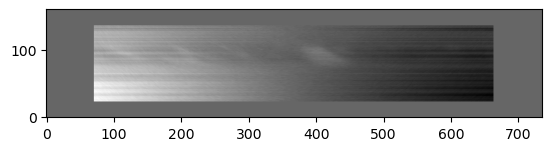

72
25
72
(256, 738)
(160, 736)


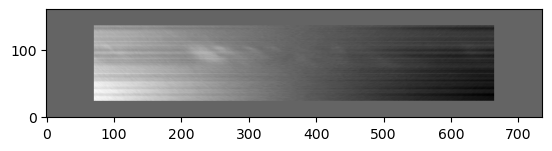

70
25
70
(251, 737)
(160, 736)


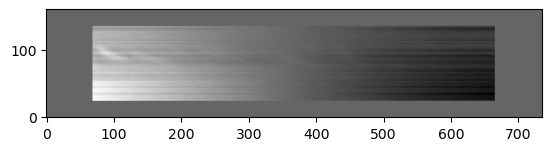

73
24
73
(259, 737)
(160, 736)


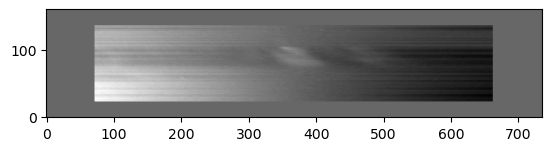

70
24
70
(253, 738)
(160, 736)


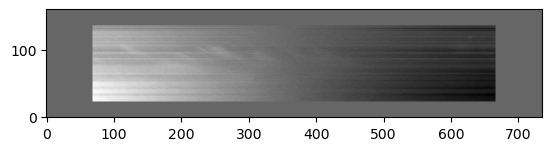

75
24
75
(264, 738)
(160, 736)


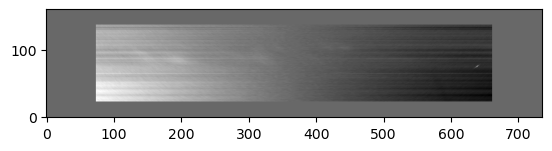

68
25
68
(248, 737)
(160, 736)


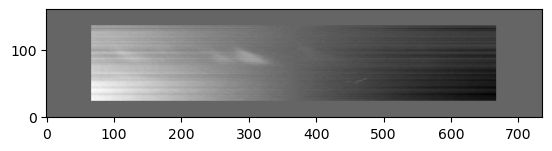

71
24
71
(255, 738)
(160, 736)


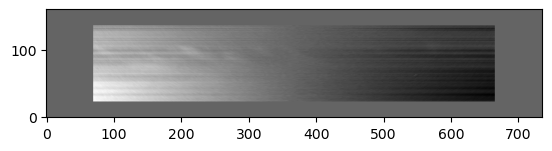

75
24
75
(264, 738)
(160, 736)


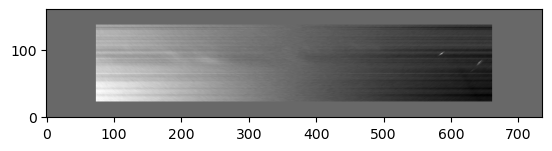

69
25
69
(250, 738)
(160, 736)


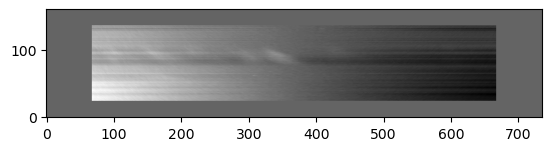

In [32]:
for opus_id in selected_df.opus_id[:10]:
    rpjb_path = opusid_to_rpjb_path(opus_id)
    filename, pixel_values = preprocess_filter.apply_filters(rpjb_path)
    pixel_values = buffer_image(pixel_values, 736, 160)
    plt.imshow(pixel_values, cmap = "gray", origin = 'lower')
    plt.show()
    